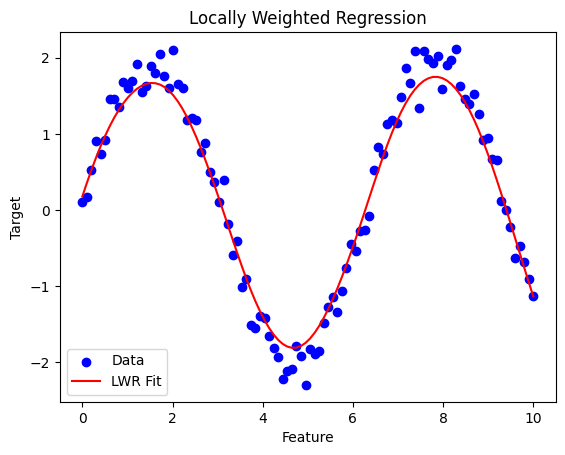

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Generate synthetic dataset
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Locally Weighted Regression function
def locally_weighted_regression(X_train, y_train, x_query, tau=0.5):
    m = X_train.shape[0]
    weights = np.exp(-cdist(x_query, X_train, 'sqeuclidean') / (2 * tau ** 2))

    y_pred = []
    for i in range(x_query.shape[0]):
        W = np.diag(weights[i])
        theta = np.linalg.pinv(X_train.T @ W @ X_train) @ X_train.T @ W @ y_train
        y_pred.append(x_query[i] @ theta)

    return np.array(y_pred)

# Add bias term
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Predict using LWR
tau = 0.5  # Bandwidth parameter
X_query = np.linspace(0, 10, 100).reshape(-1, 1)
X_query_bias = np.c_[np.ones((X_query.shape[0], 1)), X_query]
y_pred = locally_weighted_regression(X_bias, y, X_query_bias, tau)

# Plot results
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_query, y_pred, color='red', label='LWR Fit')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Locally Weighted Regression")
plt.legend()
plt.show()
